# Miscellaneous Notes

1. [Better Looking Decision Trees](#Better-Looking-Decision-Trees)
1. [Better Confusion Matrix](#Better-Confusion-Matrix)
1. [Visual Classifier Evaluation](#Visual-Classifier-Evaluation)

## Better Looking Decision Trees

First some setup:

In [1]:
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

from acquire import get_iris_data

iris = get_iris_data()\
    .drop(columns=['measurement_id', 'species_id'])\
    .rename(columns={'species_name': 'species'})

iris.head()

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Do the train-test split. For the sake of demonstration, we'll just use two features from the iris data set.

In [2]:
X, y = iris[['sepal_length', 'sepal_width']], iris.species

X_train, X_test, y_train, y_test = train_test_split(X, y)

We'll make a simple decision tree model.

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Visualize the decision tree.

In [4]:
import graphviz
from sklearn.tree import export_graphviz

feature_names = X_train.columns
class_names = sorted(y_train.unique())

dot = export_graphviz(
    tree,
    out_file=None,
    feature_names=feature_names,
    class_names=class_names, # target value names
    special_characters=True,
    filled=True,             # fill nodes w/ informative colors
    impurity=False,          # show impurity at each node
    leaves_parallel=True,    # all leaves at the bottom
    proportion=True,         # show percentages instead of numbers at each leaf
    rotate=True,             # left to right instead of top-bottom
    rounded=True,            # rounded boxes and sans-serif font
)

graph = graphviz.Source(dot, filename='iris_decision_tree', format='png')
graph.view(cleanup=True)

'iris_decision_tree.png'

Here is my decision tree:

![](iris_decision_tree.png)

## Better Confusion Matrix

In [5]:
from sklearn.metrics import confusion_matrix

predictions = tree.predict(X_train)

confusion_matrix(y_train, predictions)

array([[34,  4,  0],
       [ 1, 27, 10],
       [ 0,  9, 27]])

In [8]:
train = X_train.assign(actual=y_train, predicted=predictions)

In [9]:
train.head()

,sepal_length,sepal_width,actual,predicted
45,4.8,3.0,setosa,setosa
37,4.9,3.6,setosa,setosa
146,6.3,2.5,virginica,virginica
93,5.0,2.3,versicolor,versicolor
131,7.9,3.8,virginica,virginica


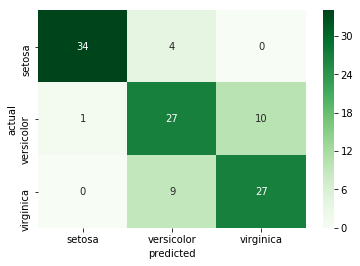

In [15]:
cm = pd.crosstab(train.actual, train.predicted)

sns.heatmap(cm, annot=True, cmap='Greens')

## Visual Classifier Evaluation

In [16]:
train['correct'] = train.actual == train.predicted

train.head()

,sepal_length,sepal_width,actual,predicted,correct
45,4.8,3.0,setosa,setosa,True
37,4.9,3.6,setosa,setosa,True
146,6.3,2.5,virginica,virginica,True
93,5.0,2.3,versicolor,versicolor,True
131,7.9,3.8,virginica,virginica,True


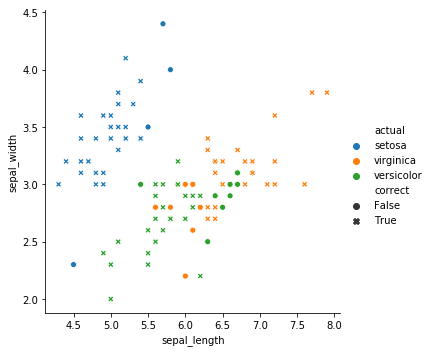

In [19]:
sns.relplot(data=train, x='sepal_length', y='sepal_width', style='correct', hue='actual')